## 왜도와 첨도 구하기
-  주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오
- 데이터셋 : House Prices - Advanced Regression Technique (https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 강의 영상 : https://youtu.be/_ft7ZlDlk7c

### 왜도
비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 **실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표**이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.

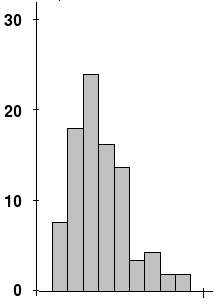

**위키백과 https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84

### 첨도
**확률분포의 꼬리가 두꺼운 정도**를 나타내는 척도이다. 극단적인 편차 또는 이상치가 많을 수록 큰 값을 나타낸다. 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 3보다 작을 경우에는(K<3) 산포는 정규분포보다 꼬리가 얇은 분포로 생각할 수 있다, 첨도값이 3보다 큰 양수이면(K>3) 정규분포보다 꼬리가 두꺼운 분포로 판단할 수 있다.

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print(df.head(10))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [2]:
# 'SalePrice'컬럼 왜도와 첨도계산 
from scipy import stats
skewness1=df['SalePrice'].skew()
kurtosis1=df['SalePrice'].kurtosis()

print(f"SalePrice 컬럼의 왜도(Skewness): {skewness1}")
print(f"SalePrice 컬럼의 첨도(Kurtosis): {kurtosis1}")

SalePrice 컬럼의 왜도(Skewness): 1.8828757597682129
SalePrice 컬럼의 첨도(Kurtosis): 6.536281860064529


In [3]:
# 'SalePrice'컬럼 로그변환
import numpy as np
print("변환 전 SalePrice:")
print(df['SalePrice'].describe())

# 로그 변환
df['SalePrice']=np.log1p(df['SalePrice'])
print("\n변환 후 SalePrice:")
print(df['SalePrice'].describe())

변환 전 SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

변환 후 SalePrice:
count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64


In [4]:
# 'SalePrice'컬럼 왜도와 첨도계산 
skewness2=df['SalePrice'].skew()
kurtosis2=df['SalePrice'].kurtosis()

print(f"SalePrice 컬럼의 왜도(Skewness): {skewness2}")
print(f"SalePrice 컬럼의 첨도(Kurtosis): {kurtosis2}")

SalePrice 컬럼의 왜도(Skewness): 0.12134661989685333
SalePrice 컬럼의 첨도(Kurtosis): 0.809519155707878


In [5]:
# 모두 더한 다음 출력
result=skewness1+kurtosis1+skewness2+kurtosis2
# 소수 2번째 자리까지 출력
print(f"{result:.2f}")

9.35


## Hint
- DataFrame.skew() 왜도
- DataFrame.kurt() 첨도

## 풀이

In [6]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

In [7]:
# 데이터 불러오기
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<AxesSubplot:>

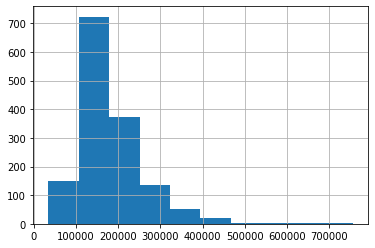

In [8]:
# EDA (시험에서는 시각화 불가)
df['SalePrice'].hist()

In [9]:
# 'SalePrice'컬럼 왜도와 첨도계산
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()
print("왜도:" ,s1)
print("첨도:" ,k1)

왜도: 1.8828757597682129
첨도: 6.536281860064529


In [10]:
# 'SalePrice'컬럼 로그변환
df['SalePrice'] = np.log1p(df['SalePrice'])

<AxesSubplot:>

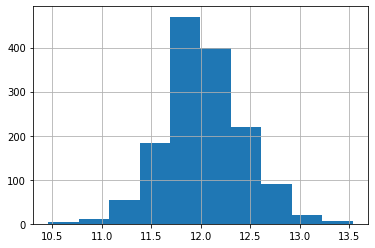

In [11]:
# EDA (시험에서는 시각화 불가)
df['SalePrice'].hist()

In [12]:
# 'SalePrice'컬럼 왜도와 첨도계산
s2 = df['SalePrice'].skew()
k2 = df['SalePrice'].kurt()
print("왜도:" ,s2)
print("첨도:" ,k2)

왜도: 0.12134661989685333
첨도: 0.809519155707878


In [13]:
# 모두 더한 다음 출력
print(round(s1+s2+k1+k2,2))

9.35
